- This notebook contains the code to generate the plots for Genre experiments.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

map_condition = {'1A':0.333, '1':0.5, '2':0.6, '3':0.7, '4':0.8, '5':0.9, '6':1.0} # map experiment number to imbalance

map_train_case = {#'A': 'Equal',
                  'B': 'Mystery',
                  'C': 'SciFi',
                  'D': 'Romance'}

In [2]:
def get_dataframe(doc_len):
    """
    Returns the entries corresponding to BERT & SVM only.
    """
    path = '../genre-results/'+doc_len+'-word-results/'

    dfs = []
    for fname in os.listdir(path):
        if not fname.startswith('genre_bias_results'):
            continue
        d = pd.read_csv(path+fname, delimiter='\t')
        
        print("Processing:", fname, "in", path, "| Shape:", d.shape)
        exp_no = fname.split('.')[0][-1:]
        d['Experiment'] = exp_no
        d.loc[d.Case=='A', 'Experiment'] = '1A'

        d['Genre Dominance'] = d['Experiment'].map(map_condition)
        d['Genre'] = d['Case'].map(map_train_case)
        dfs.append(d)

    main_df = pd.concat(dfs)
    
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("CDAFalse", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("EDAFalse", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("EDATrue", " with EDA ")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("CDATrue", " with CDA ")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("exp_1", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("exp_2", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("exp_3", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("exp_4", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("exp_5", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("exp_6", "")
    main_df['Algorithm'] = main_df['Algorithm'].str.replace("_", "")

    df = main_df.loc[main_df['Algorithm'].isin(['svm', 'BERT'])]

    df.rename(columns={'F1-score': 'F1 score', 'Relative-Entropy': 'Relative Entropy'}, 
              inplace=True)
    return df

In [3]:
experiments = ['500', '1000', '2000', '5000', '10000']

dfs = []

for words in experiments:
    print("\nDocument-Length:", words)
    df = get_dataframe(words)
    df['Document Length'] = words
    dfs.append(df)

main_df = pd.concat(dfs)


Document-Length: 500
Processing: genre_bias_results_exp1.tsv in ../genre-results/500-word-results/ | Shape: (86, 8)
Processing: genre_bias_results_exp2.tsv in ../genre-results/500-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp3.tsv in ../genre-results/500-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp4.tsv in ../genre-results/500-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp5.tsv in ../genre-results/500-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp6.tsv in ../genre-results/500-word-results/ | Shape: (6, 8)

Document-Length: 1000
Processing: genre_bias_results_exp1.tsv in ../genre-results/1000-word-results/ | Shape: (8, 8)
Processing: genre_bias_results_exp2.tsv in ../genre-results/1000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp3.tsv in ../genre-results/1000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp4.tsv in ../genre-results/1000-word-results/ | Shape: (6, 8)
Processing

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Processing: genre_bias_results_exp5.tsv in ../genre-results/5000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp6.tsv in ../genre-results/5000-word-results/ | Shape: (6, 8)

Document-Length: 10000
Processing: genre_bias_results_exp1.tsv in ../genre-results/10000-word-results/ | Shape: (8, 8)
Processing: genre_bias_results_exp2.tsv in ../genre-results/10000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp3.tsv in ../genre-results/10000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp4.tsv in ../genre-results/10000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp5.tsv in ../genre-results/10000-word-results/ | Shape: (6, 8)
Processing: genre_bias_results_exp6.tsv in ../genre-results/10000-word-results/ | Shape: (6, 8)


In [4]:
print(main_df.shape)
main_df.head()

(190, 12)


,Algorithm,Case,F1 score,Precision,Recall,Accuracy,TP-Genre,Relative Entropy,Experiment,Genre Dominance,Genre,Document Length
2,BERT,A,0.9394,0.9394,0.9394,0.9394,"{'mys': 0.3226, 'sci': 0.3333, 'rom': 0.3441}",0.000347,1A,0.333,NaN,500
3,BERT,B,0.9394,0.9394,0.9394,0.9394,"{'rom': 0.3441, 'sci': 0.3333, 'mys': 0.3226}",0.000347,1,0.500,Mystery,500
4,BERT,C,0.9474,0.9890,0.9091,0.9495,"{'mys': 0.3222, 'sci': 0.3333, 'rom': 0.3444}",0.000370,1,0.500,SciFi,500
5,BERT,D,0.9381,0.9579,0.9192,0.9394,"{'rom': 0.3516, 'sci': 0.3297, 'mys': 0.3187}",0.000837,1,0.500,Romance,500
74,svm,A,0.8910,0.8393,0.9495,0.8838,"{'rom': 0.3298, 'sci': 0.3404, 'mys': 0.3298}",0.000112,1A,0.333,NaN,500


In [5]:
main_df['% Genre Dominance'] = main_df['Genre Dominance'].apply(lambda x: x*100)
main_df.head()

,Algorithm,Case,F1 score,Precision,Recall,Accuracy,TP-Genre,Relative Entropy,Experiment,Genre Dominance,Genre,Document Length,% Genre Dominance
2,BERT,A,0.9394,0.9394,0.9394,0.9394,"{'mys': 0.3226, 'sci': 0.3333, 'rom': 0.3441}",0.000347,1A,0.333,NaN,500,33.3
3,BERT,B,0.9394,0.9394,0.9394,0.9394,"{'rom': 0.3441, 'sci': 0.3333, 'mys': 0.3226}",0.000347,1,0.500,Mystery,500,50.0
4,BERT,C,0.9474,0.9890,0.9091,0.9495,"{'mys': 0.3222, 'sci': 0.3333, 'rom': 0.3444}",0.000370,1,0.500,SciFi,500,50.0
5,BERT,D,0.9381,0.9579,0.9192,0.9394,"{'rom': 0.3516, 'sci': 0.3297, 'mys': 0.3187}",0.000837,1,0.500,Romance,500,50.0
74,svm,A,0.8910,0.8393,0.9495,0.8838,"{'rom': 0.3298, 'sci': 0.3404, 'mys': 0.3298}",0.000112,1A,0.333,NaN,500,33.3


In [6]:
main_df.loc[main_df['Relative Entropy']>0.01]

,Algorithm,Case,F1 score,Precision,Recall,Accuracy,TP-Genre,Relative Entropy,Experiment,Genre Dominance,Genre,Document Length,% Genre Dominance
5,svm,D,0.8045,0.9000,0.7273,0.8232,"{'mys': 0.3611, 'rom': 0.4306, 'sci': 0.2083}",0.041207,6,1.0,Romance,500,100.0
2,BERT,D,0.8962,0.9762,0.8283,0.9040,"{'rom': 0.3902, 'sci': 0.2683, 'mys': 0.3415}",0.011498,5,0.9,Romance,1000,90.0
2,BERT,D,0.8962,0.9762,0.8283,0.9040,"{'rom': 0.3902, 'mys': 0.3415, 'sci': 0.2683}",0.011498,6,1.0,Romance,1000,100.0
3,svm,B,0.8821,0.8958,0.8687,0.8838,"{'rom': 0.3605, 'mys': 0.3721, 'sci': 0.2674}",0.010249,6,1.0,Mystery,1000,100.0
5,svm,D,0.8380,0.9375,0.7576,0.8535,"{'rom': 0.4133, 'mys': 0.3333, 'sci': 0.2533}",0.019393,6,1.0,Romance,1000,100.0
5,svm,D,0.8783,0.9222,0.8384,0.8838,"{'mys': 0.3494, 'sci': 0.2651, 'rom': 0.3855}",0.011781,3,0.7,Romance,2000,70.0
5,svm,D,0.8757,0.9419,0.8182,0.8838,"{'rom': 0.3827, 'mys': 0.358, 'sci': 0.2593}",0.013287,4,0.8,Romance,2000,80.0
2,BERT,D,0.8778,0.9753,0.7980,0.8889,"{'rom': 0.4051, 'mys': 0.3291, 'sci': 0.2658}",0.014608,6,1.0,Romance,2000,100.0
5,svm,D,0.8276,0.9600,0.7273,0.8485,"{'rom': 0.4444, 'mys': 0.3056, 'sci': 0.25}",0.029335,6,1.0,Romance,2000,100.0
2,BERT,D,0.8095,0.9855,0.6869,0.8384,"{'rom': 0.4412, 'mys': 0.3235, 'sci': 0.2353}",0.032055,6,1.0,Romance,5000,100.0


In [7]:
import matplotlib.pyplot as plt
# plt.tight_layout()

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=12.5)    # legend fontsize

In [8]:
main_df['Algorithm'].value_counts()

BERT    95
svm     95
Name: Algorithm, dtype: int64

In [9]:
path = "../figures/genre-fig/"

In [10]:
bert = main_df.loc[main_df['Algorithm']=='BERT']
bert.reset_index(drop=True, inplace=True)

def plot_bert(doclen, y_axis):
    data = bert.loc[bert['Document Length']==doclen]
    uniform_f1_bert = data.loc[data['Case']=='A'][y_axis].values[0]
    print("BERT for Case A:", uniform_f1_bert)
    ax = sns.lineplot(x="% Genre Dominance", y=y_axis, hue="Genre", data=data)
#     ax.set_title("BERT")# (Document Length: "+doclen+")")
    plt.scatter(x=33.3, y=uniform_f1_bert, color='r') # add point for Case A
    ax.set_xticks([33.3,50,60,70,80,90,100])
    if y_axis == 'F1 score':
        ax.set_ylim([0.86,0.96])
    elif y_axis == 'Relative Entropy':
        ax.set_ylim([-0.001, 0.016])

    
    ax.figure.savefig(path+"BERT_"+y_axis+"_Words"+doclen+".png", bbox_inches="tight")

BERT for Case A: 0.9394


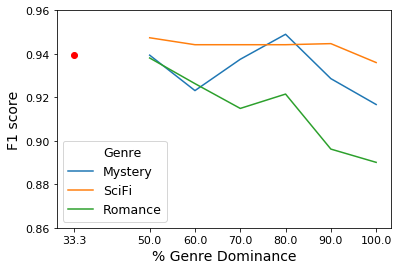

In [11]:
plot_bert('500', 'F1 score')

BERT for Case A: 0.9375


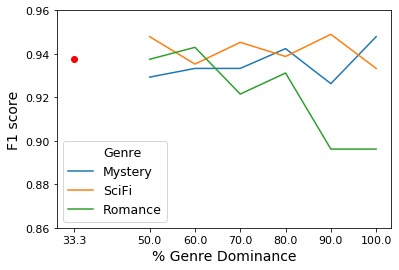

In [12]:
plot_bert('1000', 'F1 score')

BERT for Case A: 0.9388


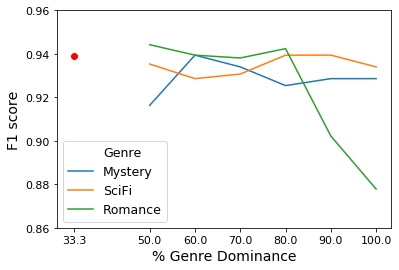

In [13]:
plot_bert('2000', 'F1 score')

BERT for Case A: 0.9388


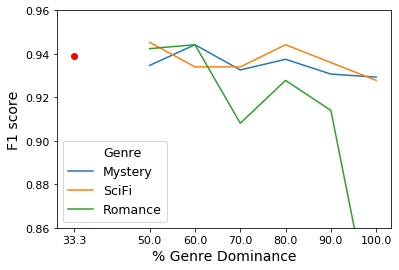

In [14]:
plot_bert('5000', 'F1 score')

BERT for Case A: 0.9694


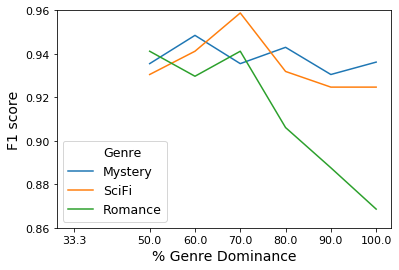

In [15]:
plot_bert('10000', 'F1 score')

BERT for Case A: 0.00034673277864040447


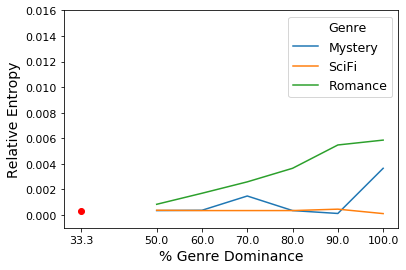

In [12]:
plot_bert('500', 'Relative Entropy')

BERT for Case A: 0.00036977230792789416


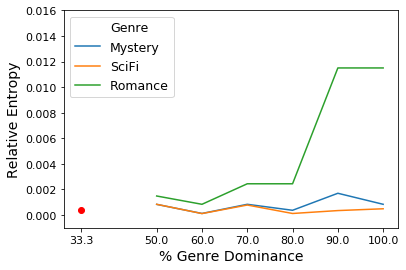

In [17]:
plot_bert('1000', 'Relative Entropy')

BERT for Case A: 0.00011922492164620576


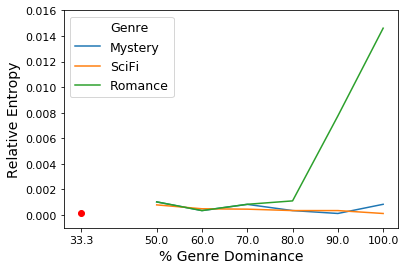

In [18]:
plot_bert('2000', 'Relative Entropy')

BERT for Case A: 0.00011922492164620576


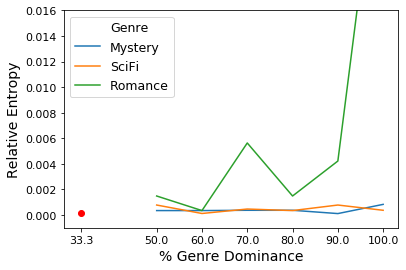

In [19]:
plot_bert('5000', 'Relative Entropy')

BERT for Case A: 0.0007801133553691497


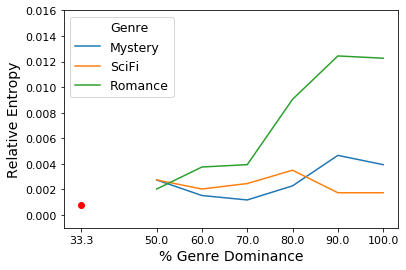

In [20]:
plot_bert('10000', 'Relative Entropy')

In [21]:
svm = main_df.loc[main_df['Algorithm']=='svm']
svm.reset_index(drop=True, inplace=True)

def plot_svm(doclen, y_axis):
    data = svm.loc[svm['Document Length']==doclen]
    uniform_f1_svm = data.loc[data['Case']=='A'][y_axis].values[0]
    print("SVM for Case A:", uniform_f1_svm)
    ax = sns.lineplot(x="Genre Dominance", y=y_axis, hue="Genre", data=data)
#     ax.set_title("SVM")# (Document Length: "+doclen+")")
    
    if y_axis == 'F1 score':
        ax.set_ylim([0.8,0.97])
    elif y_axis == 'Relative Entropy':
        ax.set_ylim([-0.001, 0.044])
    
    plt.scatter(x=0.33, y=uniform_f1_svm, color='r') # add point for Case A
    
    ax.figure.savefig(path+"SVM_"+y_axis+"_Words"+doclen+".png")

SVM for Case A: 0.8909999999999999


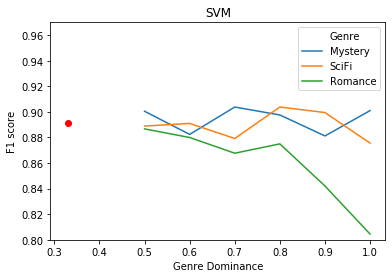

In [11]:
plot_svm('500', 'F1 score')

SVM for Case A: 0.9055


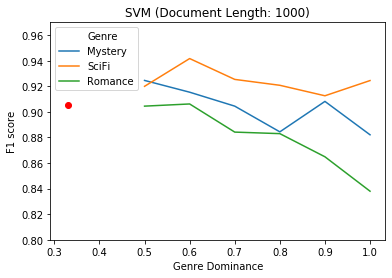

In [22]:
plot_svm('1000', 'F1 score')

SVM for Case A: 0.9406


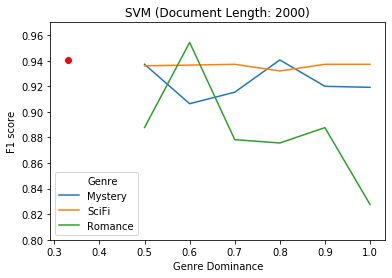

In [23]:
plot_svm('2000', 'F1 score')

SVM for Case A: 0.9596


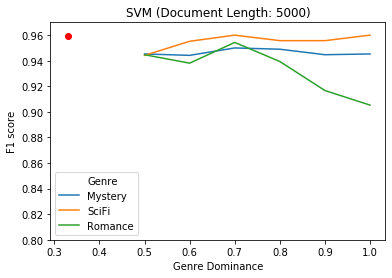

In [24]:
plot_svm('5000', 'F1 score')

SVM for Case A: 0.9557


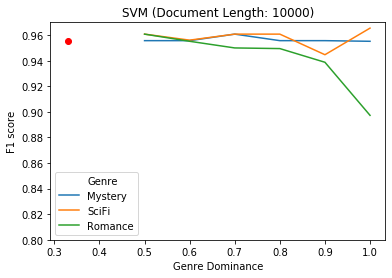

In [25]:
plot_svm('10000', 'F1 score')

SVM for Case A: 0.00011196924116578608


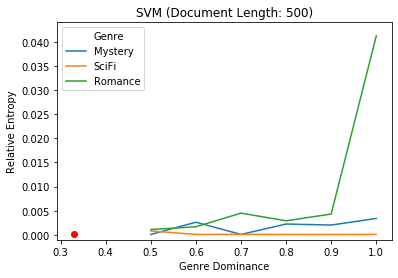

In [26]:
plot_svm('500', 'Relative Entropy')

SVM for Case A: 0.0004875712256280153


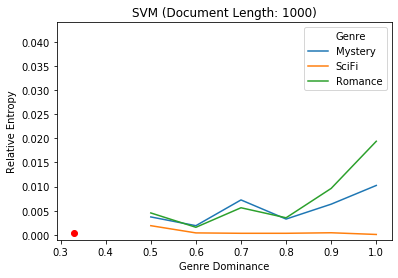

In [27]:
plot_svm('1000', 'Relative Entropy')

SVM for Case A: 0.00011066418890002749


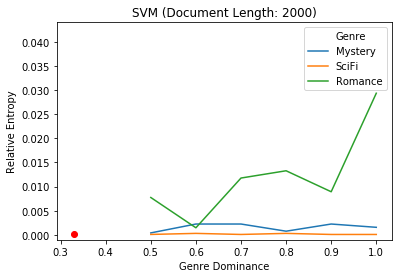

In [28]:
plot_svm('2000', 'Relative Entropy')

SVM for Case A: 0.0007801133553691497


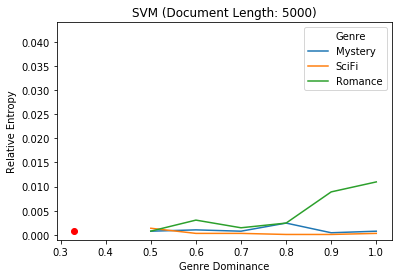

In [29]:
plot_svm('5000', 'Relative Entropy')

SVM for Case A: 0.0004273658918766236


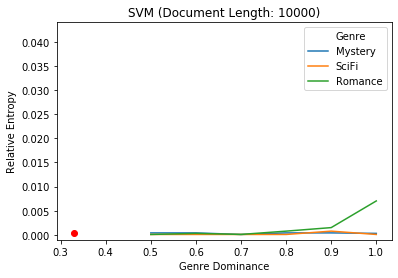

In [30]:
plot_svm('10000', 'Relative Entropy')

## Plot across document length:

In [8]:
svm_doc = svm.loc[svm['Case']=='A']
# svm_doc["Document Length"] = pd.to_numeric(svm_doc["Document Length"])

bert_doc = bert.loc[bert['Case']=='A']
# bert_doc["Document Length"] = pd.to_numeric(bert_doc["Document Length"])

print(svm_doc.shape, bert_doc.shape)

NameError: name 'svm' is not defined

In [10]:
main_df.loc[main_df['Case']=='A']

,Algorithm,Case,F1 score,Precision,Recall,Accuracy,TP-Genre,Relative Entropy,Experiment,Genre Dominance,Genre,Document Length
2,BERT,A,0.9394,0.9394,0.9394,0.9394,"{'mys': 0.3226, 'sci': 0.3333, 'rom': 0.3441}",0.000347,1A,0.33,NaN,500
70,svm,A,0.8910,0.8393,0.9495,0.8838,"{'rom': 0.3298, 'sci': 0.3404, 'mys': 0.3298}",0.000112,1A,0.33,NaN,500
0,BERT,A,0.9375,0.9677,0.9091,0.9394,"{'sci': 0.3222, 'rom': 0.3444, 'mys': 0.3333}",0.000370,1A,0.33,NaN,1000
4,svm,A,0.9055,0.8922,0.9192,0.9040,"{'rom': 0.3407, 'sci': 0.3187, 'mys': 0.3407}",0.000488,1A,0.33,NaN,1000
0,BERT,A,0.9388,0.9485,0.9293,0.9394,"{'sci': 0.337, 'rom': 0.337, 'mys': 0.3261}",0.000119,1A,0.33,NaN,2000
4,svm,A,0.9406,0.9223,0.9596,0.9394,"{'rom': 0.3368, 'sci': 0.3263, 'mys': 0.3368}",0.000111,1A,0.33,NaN,2000
0,BERT,A,0.9388,0.9485,0.9293,0.9394,"{'sci': 0.337, 'rom': 0.337, 'mys': 0.3261}",0.000119,1A,0.33,NaN,5000
4,svm,A,0.9596,0.9596,0.9596,0.9596,"{'rom': 0.3474, 'sci': 0.3158, 'mys': 0.3368}",0.000780,1A,0.33,NaN,5000
0,BERT,A,0.9694,0.9794,0.9596,0.9697,"{'sci': 0.3368, 'rom': 0.3474, 'mys': 0.3158}",0.000780,1A,0.33,NaN,10000
4,svm,A,0.9557,0.9327,0.9798,0.9545,"{'rom': 0.3402, 'sci': 0.3196, 'mys': 0.3402}",0.000427,1A,0.33,NaN,10000


In [41]:
def plot_svm_doclen(y_axis):
    ax = sns.lineplot(x="Document Length", y=y_axis, data=svm_doc, sort=False)
    ax.set_title("SVM")
    if y_axis == 'F1 score':
        ax.set_ylim([0.88, 0.975])
    elif y_axis == 'Relative Entropy':
        ax.set_ylim([-0.0001, 0.01])

    ax.figure.savefig(path+"SVM_across_doclen_"+y_axis+".png")

def plot_bert_doclen(y_axis):
    ax = sns.lineplot(x="Document Length", y=y_axis, data=bert_doc, sort=False)
    ax.set_title("BERT")
    if y_axis == 'F1 score':
        ax.set_ylim([0.90, 0.975])
    elif y_axis == 'Relative Entropy':
        ax.set_ylim([-0.0001, 0.01])

    ax.figure.savefig(path+"BERT_across_doclen_"+y_axis+".png")

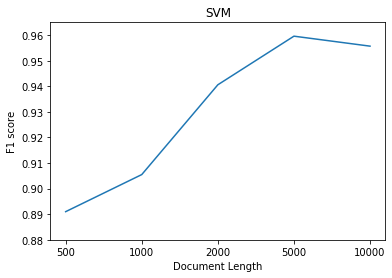

In [42]:
plot_svm_doclen('F1 score')

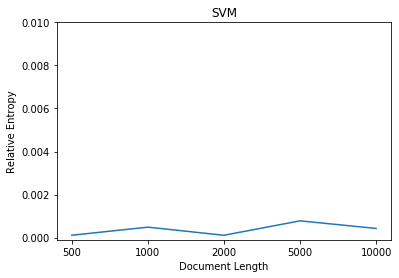

In [43]:
plot_svm_doclen('Relative Entropy')

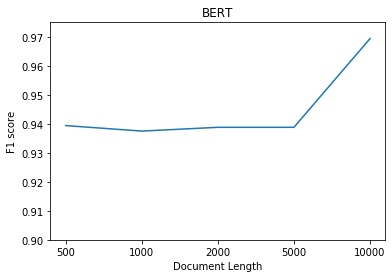

In [44]:
plot_bert_doclen('F1 score')

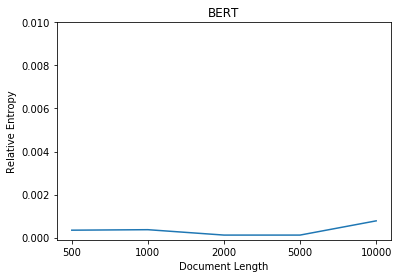

In [45]:
plot_bert_doclen('Relative Entropy')

# fin.